In [31]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,[2,3]].values
Y = dataset.iloc[:, 4].values

## Spliting the dataset into test and train set

In [32]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train,Y_train

(array([[    44,  39000],
        [    32, 120000],
        [    38,  50000],
        [    32, 135000],
        [    52,  21000],
        [    53, 104000],
        [    39,  42000],
        [    38,  61000],
        [    36,  50000],
        [    36,  63000],
        [    35,  25000],
        [    35,  50000],
        [    42,  73000],
        [    47,  49000],
        [    59,  29000],
        [    49,  65000],
        [    45, 131000],
        [    31,  89000],
        [    46,  82000],
        [    47,  51000],
        [    26,  15000],
        [    60, 102000],
        [    38, 112000],
        [    40, 107000],
        [    42,  53000],
        [    35,  59000],
        [    48,  41000],
        [    48, 134000],
        [    38, 113000],
        [    29, 148000],
        [    26,  15000],
        [    60,  42000],
        [    24,  19000],
        [    42, 149000],
        [    46,  96000],
        [    28,  59000],
        [    39,  96000],
        [    28,  89000],
        [   

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train,X_test

(array([[ 0.58164944, -0.88670699],
        [-0.60673761,  1.46173768],
        [-0.01254409, -0.5677824 ],
        [-0.60673761,  1.89663484],
        [ 1.37390747, -1.40858358],
        [ 1.47293972,  0.99784738],
        [ 0.08648817, -0.79972756],
        [-0.01254409, -0.24885782],
        [-0.21060859, -0.5677824 ],
        [-0.21060859, -0.19087153],
        [-0.30964085, -1.29261101],
        [-0.30964085, -0.5677824 ],
        [ 0.38358493,  0.09905991],
        [ 0.8787462 , -0.59677555],
        [ 2.06713324, -1.17663843],
        [ 1.07681071, -0.13288524],
        [ 0.68068169,  1.78066227],
        [-0.70576986,  0.56295021],
        [ 0.77971394,  0.35999821],
        [ 0.8787462 , -0.53878926],
        [-1.20093113, -1.58254245],
        [ 2.1661655 ,  0.93986109],
        [-0.01254409,  1.22979253],
        [ 0.18552042,  1.08482681],
        [ 0.38358493, -0.48080297],
        [-0.30964085, -0.30684411],
        [ 0.97777845, -0.8287207 ],
        [ 0.97777845,  1.867

## fitting the model into the dataset

In [38]:
# creating your model here
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
classifier.fit(X_train, Y_train)
# Predicting the result for the X_test dataset
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm 

array([[64,  4],
       [ 3, 29]])

## Visualising the training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


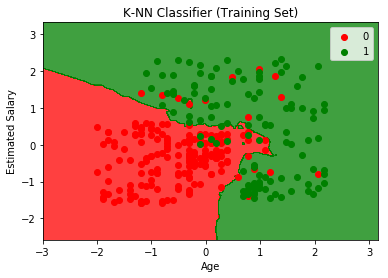

In [40]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1,stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 1].min()-1, stop = X_set[:,1].max() + 1,step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
           alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('K-NN Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

## Visualising the testing set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


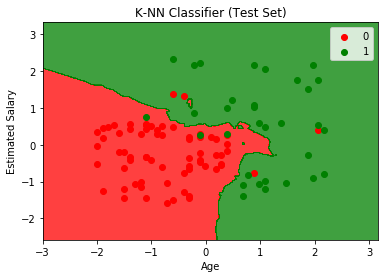

In [41]:
from matplotlib.colors import ListedColormap
X_set, Y_set = X_test, Y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1,stop = X_set[:, 0].max() +1, step = 0.01),
                    np.arange(start = X_set[:, 1].min()-1, stop = X_set[:,1].max() + 1,step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
           alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j,0], X_set[Y_set == j,1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('K-NN Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()